In [0]:
from keras.datasets import mnist
from keras.utils import np_utils

In [0]:
import numpy
import sys
import tensorflow as tf

In [0]:
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

In [72]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
import matplotlib.pyplot as plt

label=[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


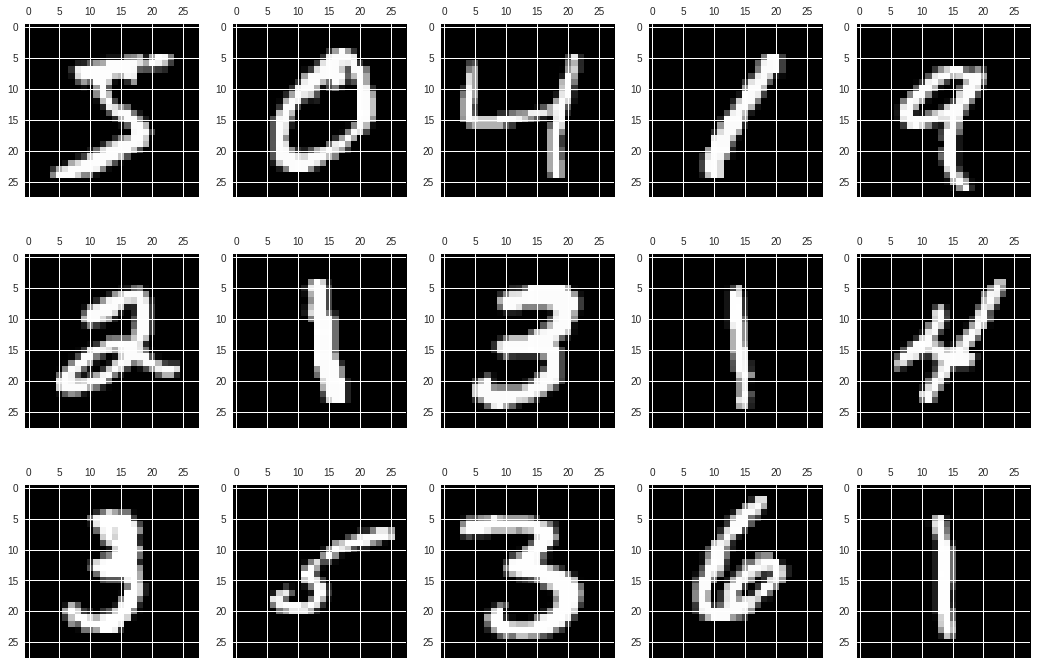

In [74]:
figure,axes = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(18,12)

plt.gray()
print("label={}".format(Y_train[0:15]))

col = 0
for row in range(0,3):
    col = row * 5
    axes[row][0].matshow(X_train[col])
    axes[row][1].matshow(X_train[col+1])
    axes[row][2].matshow(X_train[col+2])
    axes[row][3].matshow(X_train[col+3])
    axes[row][4].matshow(X_train[col+4])

In [75]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
X_train = X_train.reshape(X_train.shape[0],784)
X_train.astype('float64')
X_train = X_train/255

In [77]:
X_train.shape

(60000, 784)

In [0]:
X_test = X_test.reshape(X_test.shape[0],784)
X_test.astype('float64')
X_test = X_test/255

In [0]:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [80]:

print(Y_train[0:4])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
### 딥러닝 프레임 만들기 - 인공신경망

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
m = Sequential()

In [0]:
m.add(Dense(512,input_dim=784, activation='relu'))
m.add(Dense(10,activation='softmax'))#softmax

In [0]:
###오차함수 :categorical_crossentropy, 최적화 함수 : adam

In [0]:
m.compile(loss="categorical_crossentropy", 
         optimizer='adam',
         metrics=['accuracy'])

In [0]:
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping
MODEL_DIR = './model/' 

if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor='val_loss', 
                               verbose=1, save_best_only=True) 

#10회 이상 성능향상이 없다면 중단하라

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)



In [88]:
###샘플 200, 모두 30번 실행,
history = m.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                epochs=30,
                batch_size=200,
                verbose=0,
                callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 1.68680, saving model to ./model/01-1.6868.hdf5

Epoch 00002: val_loss improved from 1.68680 to 1.63328, saving model to ./model/02-1.6333.hdf5

Epoch 00003: val_loss improved from 1.63328 to 1.62139, saving model to ./model/03-1.6214.hdf5

Epoch 00004: val_loss improved from 1.62139 to 1.61247, saving model to ./model/04-1.6125.hdf5

Epoch 00005: val_loss improved from 1.61247 to 1.60580, saving model to ./model/05-1.6058.hdf5

Epoch 00006: val_loss improved from 1.60580 to 1.60392, saving model to ./model/06-1.6039.hdf5

Epoch 00007: val_loss improved from 1.60392 to 1.60091, saving model to ./model/07-1.6009.hdf5

Epoch 00008: val_loss did not improve from 1.60091

Epoch 00009: val_loss did not improve from 1.60091

Epoch 00010: val_loss did not improve from 1.60091

Epoch 00011: val_loss did not improve from 1.60091

Epoch 00012: val_loss did not improve from 1.60091

Epoch 00013: val_loss did not improve from 1.60091

Epoch 00014: val_lo

In [90]:
print("Test Accuracy : %.4f" %(m.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 1s 79us/step
Test Accuracy : 0.4308
